In [1]:
import keras

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
## y = mx + b + noise

In [4]:
m = 2
b = 3
x = np.linspace(0,50,100)

In [5]:
np.random.seed(101)
noise = np.random.normal(loc=0, scale=4, size=len(x))

In [6]:
y = 2*x + b + noise

In [7]:
y

array([ 13.82739936,   6.52263185,   8.65207981,   8.04560605,
         9.64487583,   6.77323287,   5.66829813,  12.49456847,
         3.0081351 ,  15.05139732,  15.21626408,  11.75510898,
        15.87599336,  13.09582491,  13.40846528,  21.97174119,
        19.92479345,  28.08674647,  31.6056873 ,  24.92595473,
        24.412682  ,  30.98701291,  18.3978785 ,  21.59584557,
        26.70306136,  29.81463662,  29.93024481,  31.01073471,
        34.51365194,  32.58476799,  35.85817836,  35.63171651,
        33.33481623,  33.31705453,  33.56980873,  40.29254194,
        38.8965431 ,  47.98075655,  42.33634622,  50.38054854,
        39.4309864 ,  45.20133943,  40.87766405,  46.43580935,
        51.54838105,  47.82815384,  49.33832989,  53.07405081,
        60.10423426,  50.05391407,  50.48374915,  53.1294775 ,
        56.11335961,  54.61756138,  59.78053217,  62.65479667,
        55.86215953,  68.02721413,  57.05058994,  65.03787123,
        65.15018185,  72.95223574,  64.12018793,  67.55

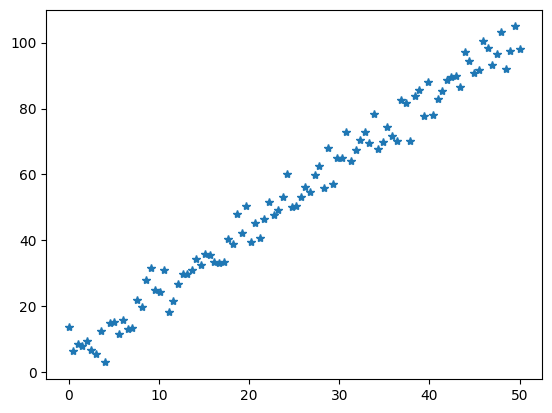

In [8]:
plt.plot(x,y,'*')

In [9]:
from keras.models import Sequential

In [10]:
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(4, input_dim=1, activation='relu'))

model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x,y, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 8ms/step - loss: 5168.0454
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 5140.7285
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 5114.4766
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 5089.6021
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 5064.8735
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 5041.3364
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 5018.1797
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 4994.5698
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 4972.5107
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 4950.3989
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 4927.6108
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 4906.4995
Epoch 13/200
4/4 [=======

In [14]:
model.history.history['loss']

[5168.04541015625,
 5140.728515625,
 5114.4765625,
 5089.60205078125,
 5064.87353515625,
 5041.33642578125,
 5018.1796875,
 4994.56982421875,
 4972.5107421875,
 4950.39892578125,
 4927.61083984375,
 4906.49951171875,
 4885.5966796875,
 4863.43017578125,
 4843.1416015625,
 4823.123046875,
 4803.85009765625,
 4784.24755859375,
 4765.05517578125,
 4745.80908203125,
 4727.15478515625,
 4708.49658203125,
 4690.8251953125,
 4671.8642578125,
 4653.83984375,
 4635.97509765625,
 4618.37744140625,
 4601.833984375,
 4585.3359375,
 4568.09228515625,
 4553.2861328125,
 4538.541015625,
 4523.93896484375,
 4509.9814453125,
 4495.9833984375,
 4481.62451171875,
 4468.61474609375,
 4454.9716796875,
 4441.9580078125,
 4428.87890625,
 4415.96728515625,
 4403.41357421875,
 4391.1318359375,
 4379.14013671875,
 4367.1376953125,
 4355.46142578125,
 4344.7158203125,
 4333.9111328125,
 4322.845703125,
 4312.75830078125,
 4302.61572265625,
 4292.208984375,
 4281.806640625,
 4271.61474609375,
 4262.0126953125,
 4

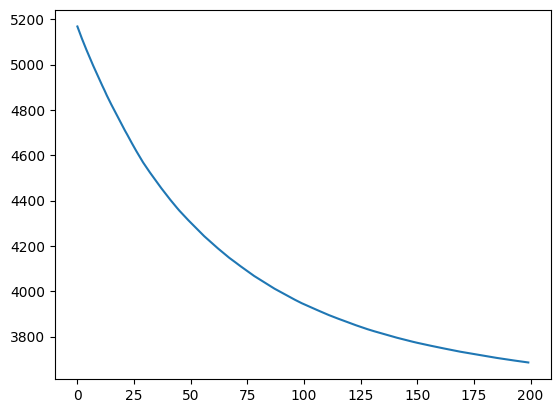

In [15]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss)

In [16]:
x_for_predictions = np.linspace(0,50,100)

In [17]:
y_pred = model.predict(x_for_predictions)

4/4 [==============================] - 0s 2ms/step


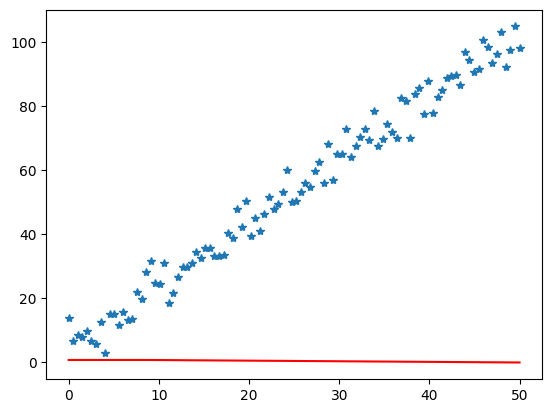

In [18]:
plt.plot(x,y,'*')
plt.plot(x_for_predictions, y_pred, 'r')

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y,y_pred)

3684.487499194036

In [21]:
df = pd.read_csv('../Data/Alcohol_Sales.csv', index_col='DATE', parse_dates=True).asfreq('MS')

In [22]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [23]:
df.columns = ['Sales']

In [24]:
df.dtypes

Sales    int64
dtype: object

<AxesSubplot:xlabel='DATE'>

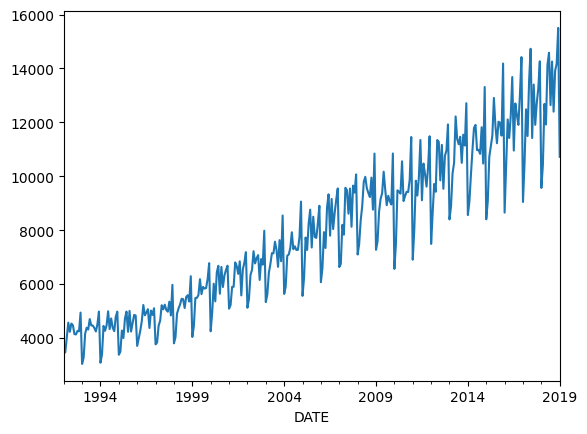

In [25]:
df['Sales'].plot()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
results = seasonal_decompose(df['Sales'])

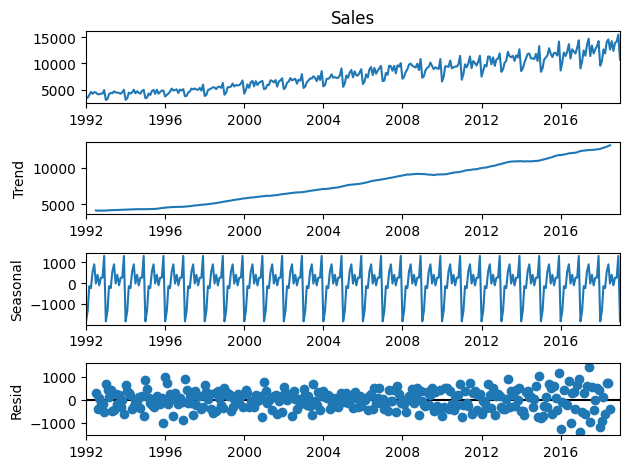

In [28]:
results.plot();

In [29]:
len(df)

325

In [30]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

Scale data = serve pra normalizar os dados em alguma escala, nesse caso, 
dividindo pelo dado com maior valor, assim fazendo com que tudo fique entre 0 e 1

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(train) # acha o maior valor do set

MinMaxScaler()

In [34]:
scaled_train = scaler.transform(train)

In [35]:
scaled_test = scaler.transform(test)

In [36]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [38]:
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_test, length=n_input, batch_size=1)

ValueError: Data and targets have to be of same length. Data length is 313 while target length is 12